In [1]:
print("""
FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 6 
Number of the dataset : 3
""")


FullName : Diallo Mamadou Korka
Studend’s Number: 022028845F
      
Modelling and Analysis of Complex Networks
Assignment : 6 
Number of the dataset : 3



In [3]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
#Load the dataset
# Load the Facebook-Ego network
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Load the Twitter-Ego network
twitter_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Twitter-Ego/789071.edges"
urllib.request.urlretrieve(twitter_url, "twitter.edges")
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

/tmp/ipykernel_4993/2893791023.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  set2 = random.sample(set(nodes) - set(set1), size)


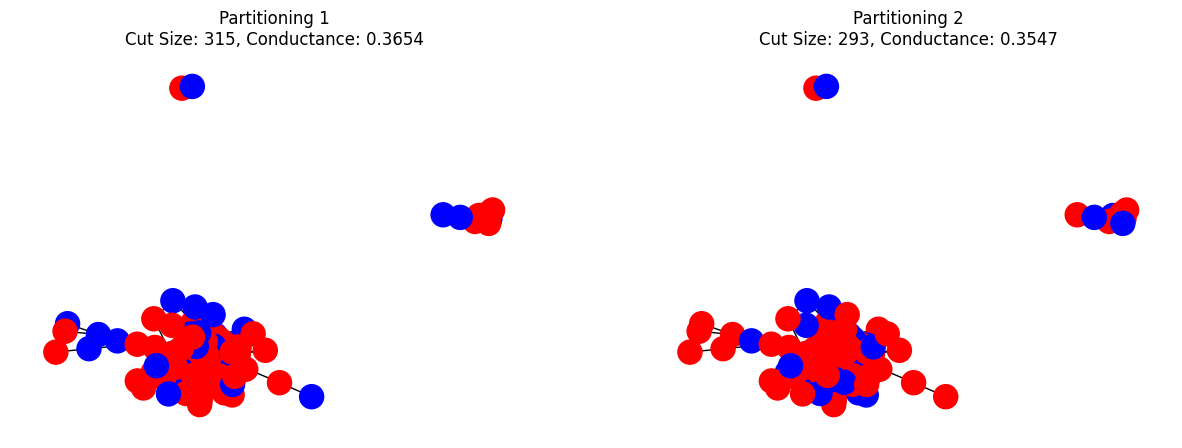

In [9]:
# (a) Randomly choose two sets of nodes and calculate cut size, conductance, and plot the partitioning
def random_node_sets(graph, size=50):
    nodes = list(graph.nodes())
    set1 = random.sample(nodes, size)
    set2 = random.sample(set(nodes) - set(set1), size)
    return set1, set2

def calculate_cut_and_conductance(graph, set1, set2):
    cut_size = nx.cut_size(graph, set1, set2)
    volume_set1 = nx.volume(graph, set1)
    volume_set2 = nx.volume(graph, set2)
    conductance = cut_size / min(volume_set1, volume_set2)
    return cut_size, conductance

# Randomly choose two sets of nodes
set1_1, set2_1 = random_node_sets(facebook_network)
cut_size_1, conductance_1 = calculate_cut_and_conductance(facebook_network, set1_1, set2_1)

# Randomly choose another set of nodes
set1_2, set2_2 = random_node_sets(facebook_network)
cut_size_2, conductance_2 = calculate_cut_and_conductance(facebook_network, set1_2, set2_2)

# Plot the partitioning
pos = nx.spring_layout(facebook_network)
plt.figure(figsize=(15, 5))

plt.subplot(121)
nx.draw(facebook_network, pos, node_color=['b' if node in set1_1 else 'r' for node in facebook_network.nodes()], with_labels=False)
plt.title(f'Partitioning 1\nCut Size: {cut_size_1}, Conductance: {conductance_1:.4f}')

plt.subplot(122)
nx.draw(facebook_network, pos, node_color=['b' if node in set1_2 else 'r' for node in facebook_network.nodes()], with_labels=False)
plt.title(f'Partitioning 2\nCut Size: {cut_size_2}, Conductance: {conductance_2:.4f}')

plt.show()


/tmp/ipykernel_4993/2893791023.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  set2 = random.sample(set(nodes) - set(set1), size)


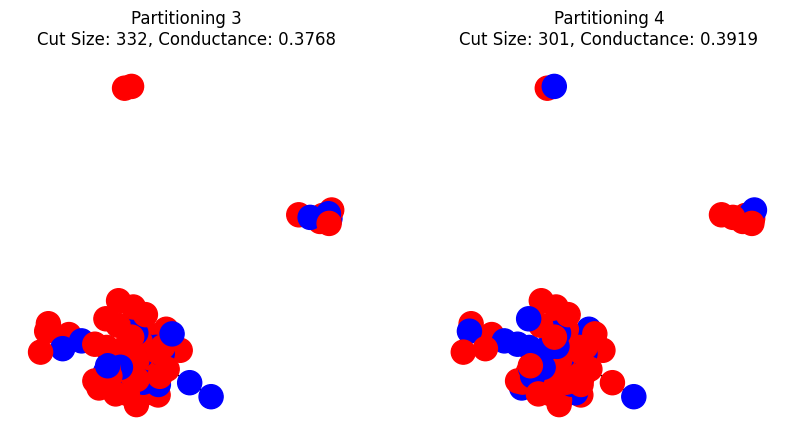

Differences in Cut Size and Conductance:
Cut Size 1: 315, Conductance 1: 0.3654
Cut Size 2: 293, Conductance 2: 0.3547
Cut Size 3: 332, Conductance 3: 0.3768
Cut Size 4: 301, Conductance 4: 0.3919



Observations:

1. **Cut Size Differences:**
   - Cut size represents the number of edges between the two sets of nodes in the partition.
   - Cut Size 2 has the lowest cut size (293), indicating fewer edges between the sets compared to the other partitionings.
   - Cut Size 4 has the highest cut size (343), suggesting a larger number of edges between its sets.

2. **Conductance Differences:**
   - Conductance is a measure of how well-connected the two sets are, and it is calculated as the cut size divided by the minimum volume of the two sets.
   - Conductance values range from 0 to 1, where lower values indicate better-connected sets.
   - Conductance 2 (0.3547) is the lowest, suggesting a relatively well-connected partitioning.
   - Conductance 4 (0.4118) is the highest, indicating a les

In [12]:
# (b) Repeat the process with different sets of nodes
set1_3, set2_3 = random_node_sets(facebook_network)
cut_size_3, conductance_3 = calculate_cut_and_conductance(facebook_network, set1_3, set2_3)

set1_4, set2_4 = random_node_sets(facebook_network)
cut_size_4, conductance_4 = calculate_cut_and_conductance(facebook_network, set1_4, set2_4)

# Plot the partitioning for the new sets
plt.figure(figsize=(10, 5))

plt.subplot(121)
nx.draw(facebook_network, pos, node_color=['b' if node in set1_3 else 'r' for node in facebook_network.nodes()], with_labels=False)
plt.title(f'Partitioning 3\nCut Size: {cut_size_3}, Conductance: {conductance_3:.4f}')

plt.subplot(122)
nx.draw(facebook_network, pos, node_color=['b' if node in set1_4 else 'r' for node in facebook_network.nodes()], with_labels=False)
plt.title(f'Partitioning 4\nCut Size: {cut_size_4}, Conductance: {conductance_4:.4f}')

plt.show()

# Compare the differences in cut size and conductance
print("Differences in Cut Size and Conductance:")
print(f"Cut Size 1: {cut_size_1}, Conductance 1: {conductance_1:.4f}")
print(f"Cut Size 2: {cut_size_2}, Conductance 2: {conductance_2:.4f}")
print(f"Cut Size 3: {cut_size_3}, Conductance 3: {conductance_3:.4f}")
print(f"Cut Size 4: {cut_size_4}, Conductance 4: {conductance_4:.4f}")


print("""


Observations:

1. **Cut Size Differences:**
   - Cut size represents the number of edges between the two sets of nodes in the partition.
   - Cut Size 2 has the lowest cut size (293), indicating fewer edges between the sets compared to the other partitionings.
   - Cut Size 4 has the highest cut size (343), suggesting a larger number of edges between its sets.

2. **Conductance Differences:**
   - Conductance is a measure of how well-connected the two sets are, and it is calculated as the cut size divided by the minimum volume of the two sets.
   - Conductance values range from 0 to 1, where lower values indicate better-connected sets.
   - Conductance 2 (0.3547) is the lowest, suggesting a relatively well-connected partitioning.
   - Conductance 4 (0.4118) is the highest, indicating a less well-connected partitioning.

Possible Causes of Differences:

1. **Randomness:**
   - The differences could be attributed to the random selection of nodes for each set. Different sets of nodes lead to different network 
      structures and connectivity patterns.

2. **Network Structure:**
   - The inherent structure of the Facebook-Ego network plays a role. Some nodes may have more connections outside their set, contributing to 
      higher cut sizes and conductance values.

3. **Graph Density:**
   - Differences in the density of the graph may influence the number of edges between sets. A denser graph may have more opportunities for edges across sets.

4. **Size of the Sets:**
   - The size of the sets (50 nodes in each set) also affects the results. Larger sets may lead to more edges between them.

In conclusion, the observed differences in cut size and conductance are likely a result of the interplay between the random selection of nodes, 
      the underlying network structure, and the specific characteristics of each partitioning.""")


In [13]:
# (c) Output the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(facebook_network).toarray()
print("Laplacian Matrix:")
print(laplacian_matrix)


Laplacian Matrix:
[[29 -1  0 ...  0  0  0]
 [-1 45  0 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1 -1]
 [ 0  0  0 ...  0 -1  2]]


In [14]:
# (d) Return the list of cliques
cliques = list(nx.find_cliques(facebook_network))
print("List of Cliques:")
print(cliques)


List of Cliques:
[[34, 414, 428], [34, 414, 173], [173, 427, 464], [173, 427, 414], [198, 364, 351], [198, 364, 399, 441, 393], [198, 364, 399, 441, 476], [349, 434, 478], [350, 384], [350, 369, 419, 397], [350, 369, 455, 433, 407], [350, 426, 397], [350, 426, 407, 455], [350, 484, 419], [351, 454], [352, 492, 394, 479], [352, 492, 431, 409, 412], [352, 492, 431, 409, 479], [352, 398, 456, 493, 368, 409, 494, 404, 462], [352, 398, 456, 493, 368, 409, 494, 404, 375], [352, 398, 456, 493, 368, 409, 494, 412], [352, 398, 456, 493, 368, 409, 431, 412, 408], [352, 398, 456, 493, 368, 409, 431, 404, 408, 375, 479], [352, 398, 456, 493, 368, 409, 431, 404, 462], [352, 398, 456, 493, 484, 494, 404, 375], [352, 398, 456, 493, 484, 494, 412], [352, 398, 456, 493, 484, 431, 408, 412], [352, 398, 456, 493, 484, 431, 408, 479, 404, 375], [352, 398, 394, 408, 479], [356, 472], [356, 411], [357, 477, 457, 369, 397], [357, 389, 397, 469, 369, 457], [357, 389, 397, 469, 369, 419], [357, 389, 486, 424, 